In [2]:
setwd("/projects/CARDIPS/analysis/epigenome_resource")
source("analyses/jennifer/notebooks/functions.R")

set.seed(5366)

In [3]:
analyses = c("eqtls", "caqtls", "haqtls")
tissues = c( "iPSC", "CVPC", "PPC")

In [4]:
plotlist = list()

type = "peer"

for (a in analyses)
{
    for (t in tissues)
    {
        
        if (file.exists(paste(a, t, "step_3", paste0(type, "_test.txt"), sep = "/")))
        {
            message(a, appendLF = F)
            peer = fread(paste(a, t, "step_3", paste0(type, "_test.txt"), sep = "/"), data.table = F)
            top = readLines(paste(a, t, "step_3", paste0(type, "_n_optimized.txt"), sep = "/"))

            message(paste(a, t, top), appendLF = F)
            
            peer$pct_egenes = peer$n_egenes / peer$n_elements * 100

#             if (t == "PPC") { t = "iPSC-PPC" }
#             if (t == "CVPC") { t = "iPSC-CVPC" }
            
            ylabel = ifelse(a == "eqtls", "eGenes (%)", ifelse(a == "caqtls", "caPeaks (%)", "haPeaks (%)") )

            p = ggplot(peer, aes(x = peer, y = pct_egenes)) + geom_point(size = 5) +
                geom_point(data = peer %>% filter(peer == top), color = "red", size = 5) + 
                theme(
                    panel.background = element_rect(fill = NA),
                    panel.border = element_rect(size = 0.8, fill = NA),
                    axis.text = element_text(size = 20),
                    axis.title = element_text(size = 20),
                    plot.title = element_text(hjust = 0.5, size = 20),
                    plot.margin = margin(t = 1.3, r = 1.3, b = 1.3, l = 1.3, unit = "cm")
                ) + xlab("PEER factors (N)") + ylab(ylabel) + 
                geom_vline(xintercept = as.numeric(top), linetype = "dashed", color = "red") +
                ggtitle(t) + 
                annotate("text", x = -Inf, y = Inf, label = paste("n =", top), color = "red", hjust = -0.2, vjust = 2, size = 9)

            plotlist[[paste(a,t)]] = p
        }
            
    }
}


eqtls
eqtls iPSC 51
Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
eqtls
eqtls CVPC 35
eqtls
eqtls PPC 22
caqtls
caqtls iPSC 28
caqtls
caqtls CVPC 28
caqtls
caqtls PPC 20
haqtls
haqtls iPSC 8
haqtls
haqtls CVPC 19


In [5]:
length(plotlist)

[1] 8

In [6]:
toplot = as.data.frame(rbindlist(lapply(analyses, function(a)
{
    as.data.frame(rbindlist(lapply(tissues, function(t)
    {
        if (file.exists(paste(a, t, "step_3", paste0(type, "_test.txt"), sep = "/")))
        {
            message(a, appendLF = F)
            
            peer = fread(paste(a, t, "step_3", paste0(type, "_test.txt"), sep = "/"), data.table = F)
            top = readLines(paste(a, t, "step_3", paste0(type, "_n_optimized.txt"), sep = "/"))

            message(paste(a, t, top), appendLF = F)
            
            peer$pct_egenes = peer$n_egenes / peer$n_elements * 100
            
            peer$analysis = a
            peer$tissue = t
            peer$top = ifelse(peer$peer == top, T, F)
            
            return(peer)
        }
            
    })))
})))

toplot = toplot %>% 
    dplyr::rename(Analysis = analysis, 
                  Tissue = tissue,
                  Peer = peer, 
                  N_Elements_Tested = n_elements,
                  N_qElements = n_egenes,
                  Pct_qElements = pct_egenes) %>%
    select(Analysis, Tissue, Peer, N_Elements_Tested, N_qElements, Pct_qElements)
toplot$Analysis = mapvalues(toplot$Analysis, from = c("eqtls", "caqtls", "haqtls"), to = c("eQTL", "caQTL", "haQTL"))

fwrite(toplot, "manuscript/figures/SourceData.Supp_Figure7.PEER_Optimization.txt", row.names = F, sep = "\t")

eqtls
eqtls iPSC 51
eqtls
eqtls CVPC 35
eqtls
eqtls PPC 22
caqtls
caqtls iPSC 28
caqtls
caqtls CVPC 28
caqtls
caqtls PPC 20
haqtls
haqtls iPSC 8
haqtls
haqtls CVPC 19


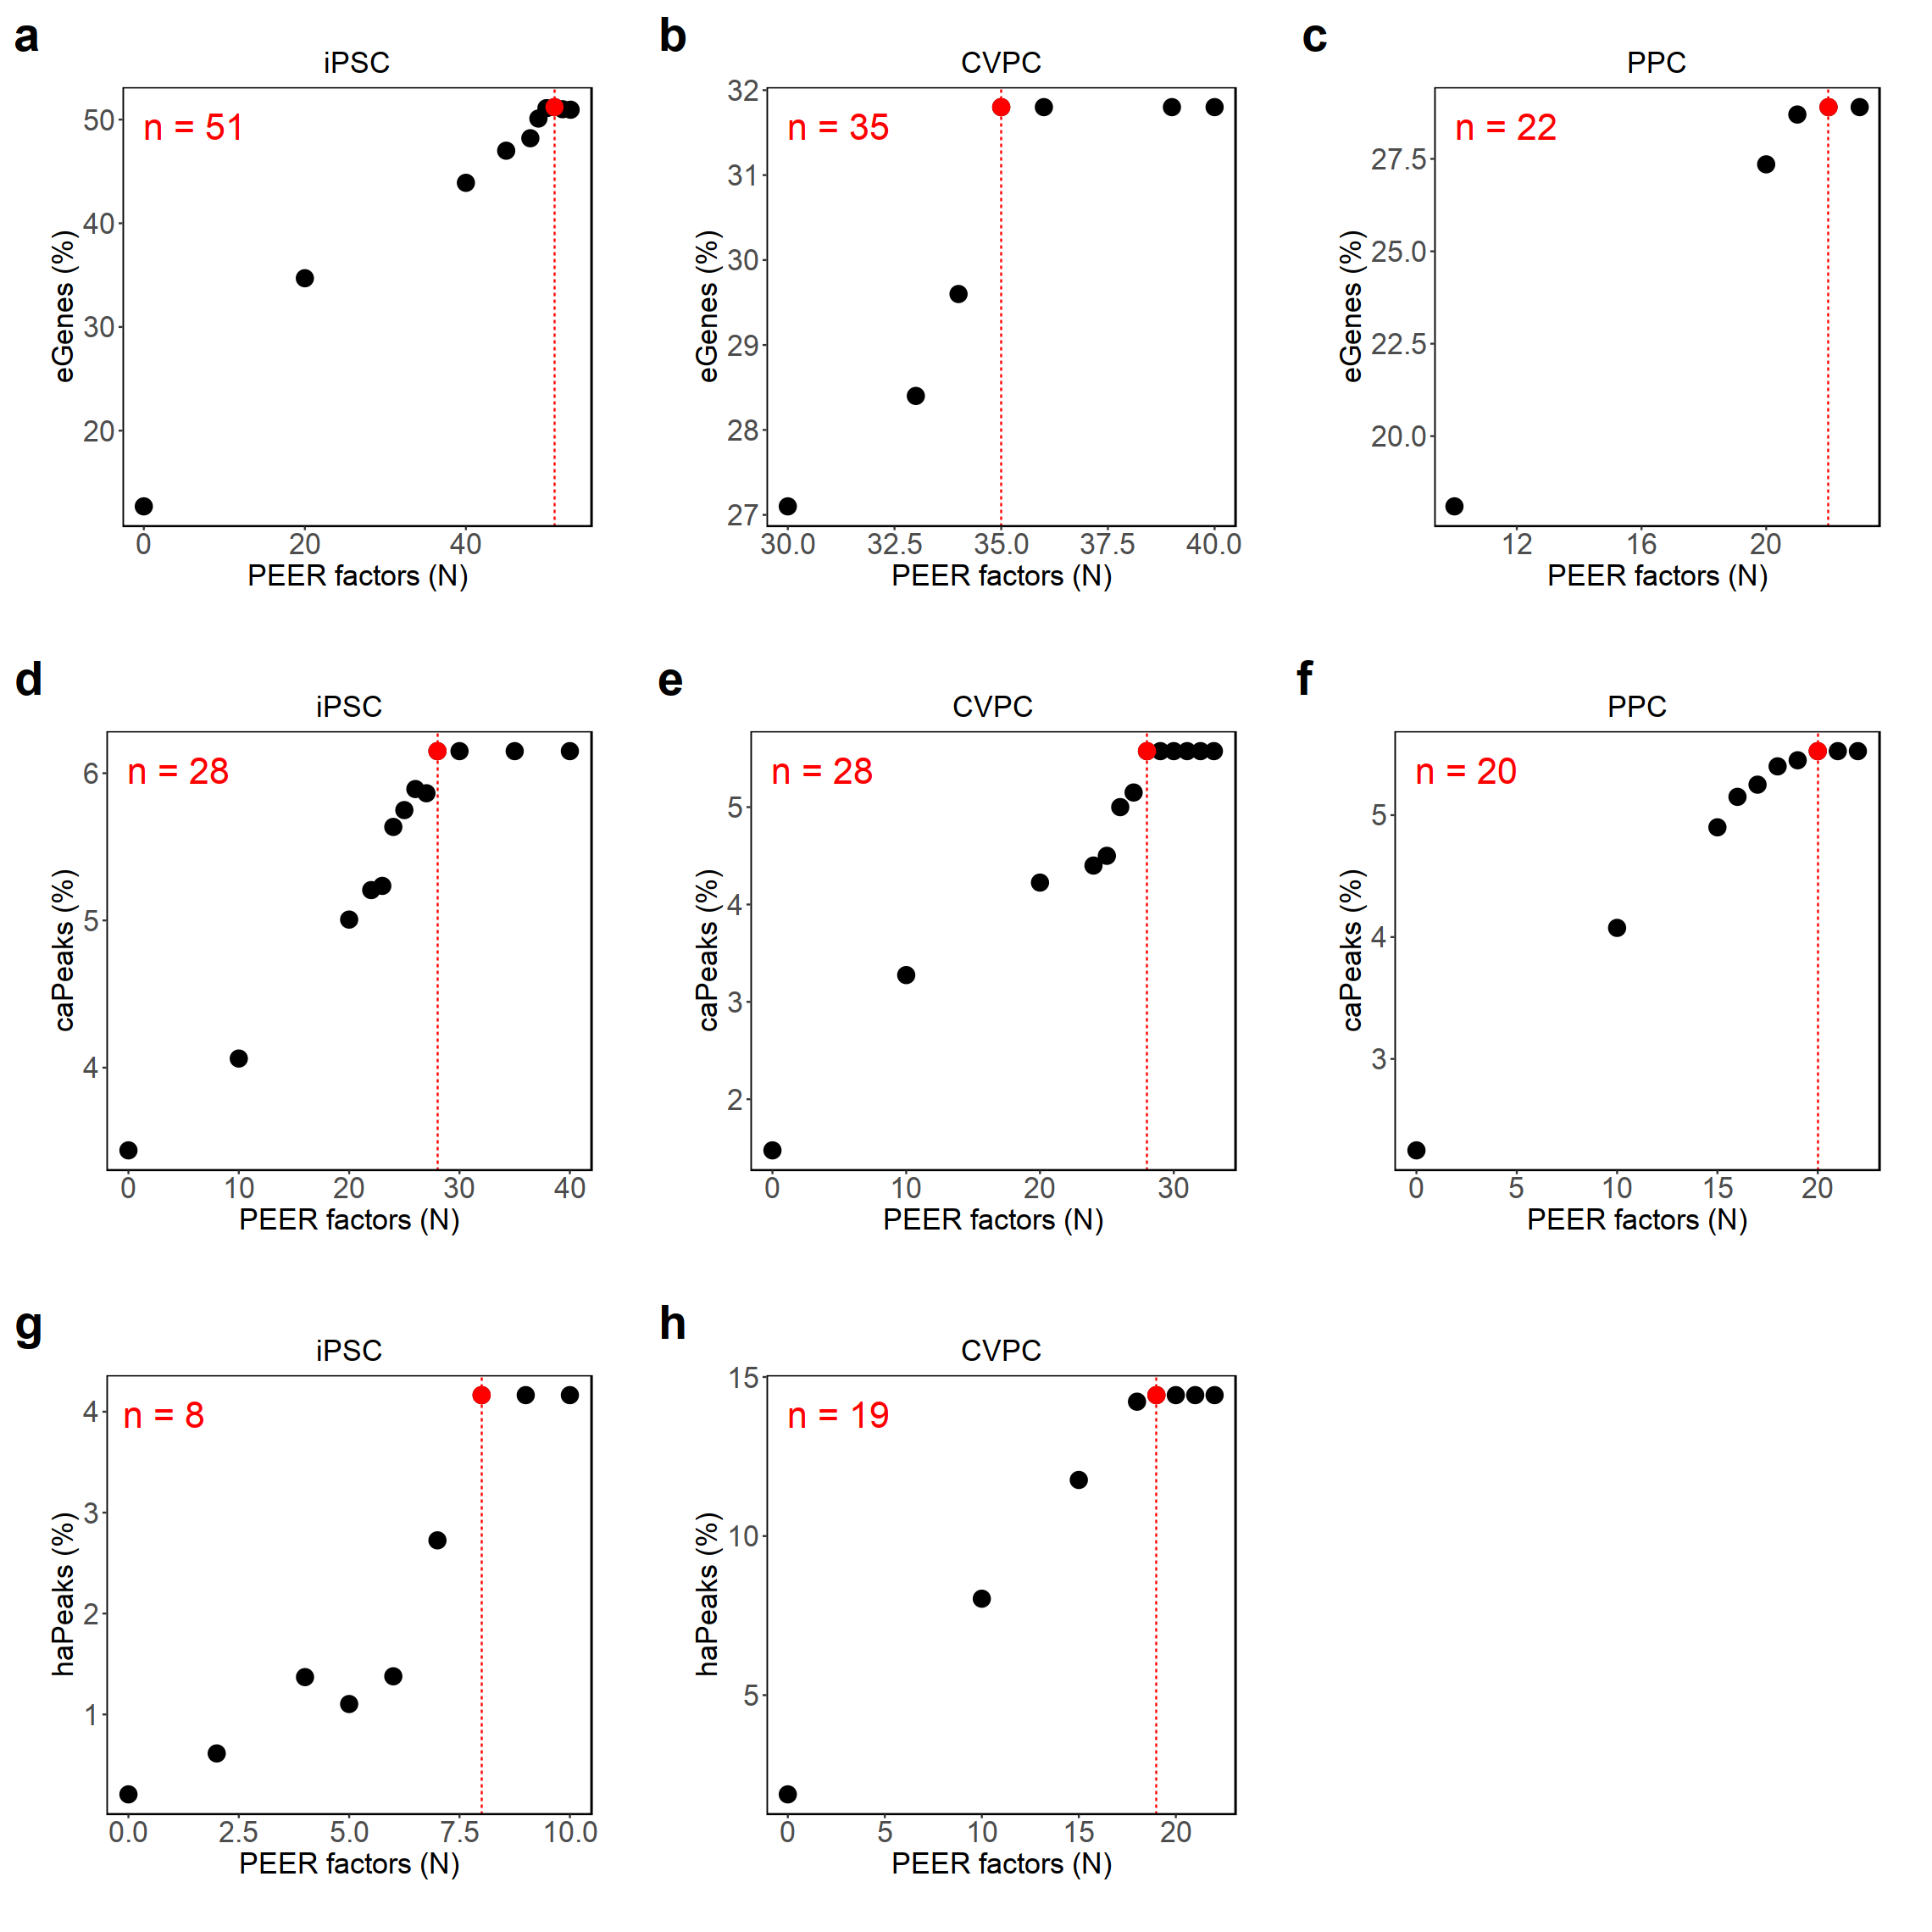

In [7]:
psize(w = 19, h = 19)
g = plot_grid(plotlist = plotlist, nrow = 3, ncol = 3, labels = c("a", "b", "c", "d", "e", "f", "g", "h", "i"), label_size = 33)
g

In [19]:
# png("analyses/jennifer/figures/peer_optimization.png", width = 7000, height = 7000, res = 400)
# g
# dev.off()